# Linear Regression
In the nature (or in a real life situation), it is unusual to observe a variable, let's say $y$, and its exact mathematical relationship with another variables $x$. Suppose now that we would like to model the (linear) relationship between a dependent variable $y$ and  the explanatory variable $x$. Usually, a first modeling would take this form

\begin{equation}
     y = \beta_{0} + \beta_{1}x + \varepsilon \  \ ,
\end{equation}

where $\varepsilon$ is a random variable that we CAN NOT observe and who adds noise to the linear relationship between the dependent and independent variables. Altough the noise $\varepsilon$ is unobservable, we can still estimate the real model. The relationship between the dependent and independent variables will be now estimated by

\begin{equation}
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 \ \ .
\end{equation}

Q.This is great, but how can we estimate $\hat{y}$ ?

A.By estimating $\hat{\beta}$.

Q.How can we estimate $\hat{\beta}$ ?

A.Good question! But first, let's create some artificial data :D









The dependent variable $x$ will variate between 0 and 2. The TRUE relationship between $y$ and $x$ will take this form 

\begin{equation}
    y = e^{\ 3 x} + \varepsilon \ \ \text{where} \ \  \varepsilon \sim \mathcal{N}(0,50^2) \ \ ,
\end{equation}

where the noise $\varepsilon$ will follow a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) of mean $\mu=0$ and standard deviation $\sigma=50$. Let's produce $n=200$ observations defined by the above equation.


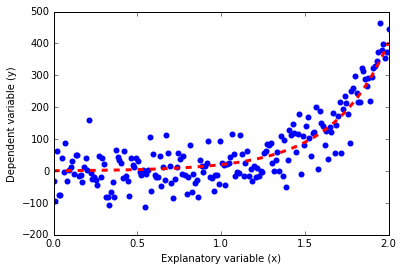

In [2]:
import numpy as np

n=200

x_tr = np.linspace(0.0, 2.0, n)
y_tr = np.exp(3*x_tr)

import random

mu, sigma = 0,50
random.seed(1)
y = y_tr + np.random.normal(loc=mu, scale= sigma, size=len(x_tr))

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_tr,y,".",mew=3);
plt.plot(x_tr, y_tr,"--r",lw=3);


plt.xlabel('Explanatory variable (x)')
plt.ylabel('Dependent variable (y)')

The red curve is defined by the function 

\begin{equation}
 \\  f(x) = e^{\ 3 x} \ \ ,
\end{equation}

and the blue dots are actually the dependent variable defined by 

\begin{equation}
    y = e^{\ 3 x} + \varepsilon \ \ \text{where}  \ \  \varepsilon \sim \mathcal{N}(0,50^2) \ \ .
\end{equation}


Here are the available Line2D properties (See matplotlib tutorial for more `pyplot` options [here](http://matplotlib.org/users/pyplot_tutorial.html)). For the list of generating random numbers see [here](http://docs.scipy.org/doc/numpy/reference/routines.random.html).

We can check the histogram of y (for histogram and other matplot pyplots see [here](http://matplotlib.org/api/pyplot_api.html)).

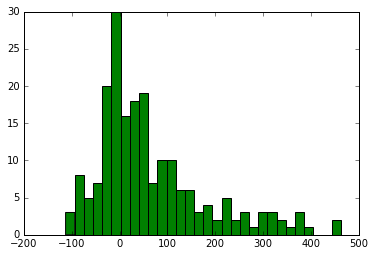

In [3]:
ignored=plt.hist(y,30, color="g")

#### Let's fit a simple linear model on $y$ and $x$. 
First of all, we need to import the librairy [scikit.learn](http://scikit-learn.org/stable/). There is a lot of algorithms and each of them is well explained. Stop wasting your time with [cat video](https://www.youtube.com/watch?v=UoUEQYjYgf4), be a [data scientist](http://www.sintetia.com/wp-content/uploads/2014/05/Data-Scientist-What-I-really-do.png). We won't talk about how we can theorically fit the model, but you may find the information [here](https://en.wikipedia.org/wiki/Linear_regression#Estimation_methods).

(200,)
(200, 1)


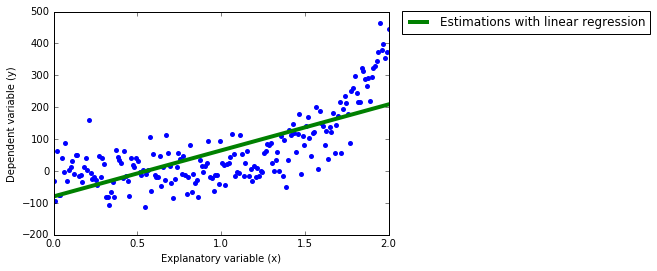

In [5]:
import sklearn.linear_model as lm
lr=lm.LinearRegression()

#We can see that the dimensions indicated are different
#In fact, the data in the second expression is "reshape" 
#This is necessary if we want to use the linear regression command with scikit learn
#Otherwise, python send us a message error
print np.shape(x_tr)
print np.shape(x_tr[:, np.newaxis])

#We regress y on x, then estimate y
lr.fit(x_tr[:, np.newaxis],y)
y_hat=lr.predict(x_tr[:, np.newaxis])

plt.plot(x_tr,y,".",mew=2)
plt.plot(x_tr, y_hat,"-g",lw=4, label='Estimations with linear regression')

plt.xlabel('Explanatory variable (x)')
plt.ylabel('Dependent variable (y)')
plt.legend(bbox_to_anchor=(1.8, 1.03))

Well, that's not really good... We can do better!

#### Exercise

Replace $x$ with $x^2$ and regress $y$ as defined earlier on $x^2$. 
The 'new' fitted model will be 

\begin{equation}
    \hat{y}=\hat{\beta}_0+ \hat{\beta}_1 x^2 \ .
\end{equation}



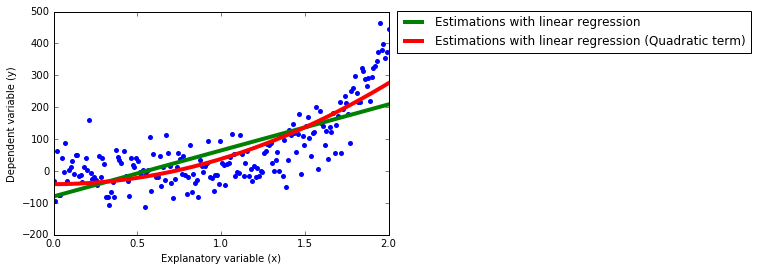

In [6]:
#And then fit the model
lr.fit(x_tr[:, np.newaxis]**2,y)
y_hat2=lr.predict(x_tr[:, np.newaxis]**2)

#Let's check it out
plt.plot(x_tr,y,".",mew=2);

plt.plot(x_tr, y_hat,"-g",lw=4, label='Estimations with linear regression')
plt.plot(x_tr, y_hat2,"-r",lw=4, label='Estimations with linear regression (Quadratic term)');


plt.xlabel('Explanatory variable (x)')
plt.ylabel('Dependent variable (y)')
plt.legend(bbox_to_anchor=(2.1, 1.03))

#### Question
Which one do you prefer?

# Classification
In the last example, the dependent variable was continuous. Now suppose that the dependent $y$ variable is binary. This makes the cross-road between regression and classification. First, let's create the binary outcome.

In [7]:
index=y>90
z=(1*(y>90)-0.5)*2

#print index, z

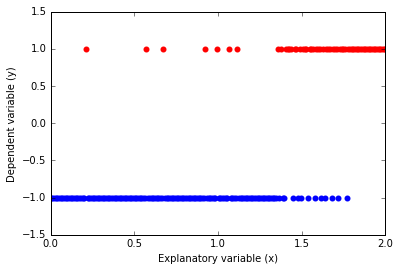

In [8]:
#The tilt symbol ~ below means the opposite of the boolean value
plt.figure()
plt.plot(x_tr[index],z[index],".r",mew=3)
plt.plot(x_tr[~index],z[~index],".b",mew=3)

plt.ylim(-1.5,1.5)
plt.xlabel('Explanatory variable (x)')
plt.ylabel('Dependent variable (y)')

### Linear regression
Now that the new dependent variable $z$ takes binary values (-1 or 1), we could still think of it as a real-valued variable on which we can do standard linear regression! Thus, the gaussian noise model on $z$ doesn't make sense anymore, but we can still do least-squares approximation to estimate the parameters of a linear decision boundary.

In [9]:
lr.fit(x_tr[:, np.newaxis],z)
z_hat=lr.predict(x_tr[:, np.newaxis])

#We define a threshold overwhat the z estimation will be considered as 1
threshold = 0

z_class= 2*(z_hat>threshold) - 1

We create 2 functions. The first one, called plotbc should plot the predictions done (and their accurancy) by the linear regression. The second one calculate the classification rate.

In [10]:
#This function simply calculate the classification rate on the training set
def plotbc(x, y, z):
    #Plot the classification
    plt.plot(x[z==1],z[z==1],".r", markersize=3, label='True positive')
    plt.plot(x[z==-1],z[z==-1],".b", markersize=3, label='True negative')

    #Plot the classification errors
    plt.plot(x[(z==-1) & (y==1)],z[(z==-1) & (y==1)],"^y", markersize=10, label='False negative')
    plt.plot(x[(z==1) & (y==-1)],z[(z==1) & (y==-1)],"^c", markersize=10, label='False positive')
    plt.legend(bbox_to_anchor=(1.55, 1.03))

    plt.ylim(-1.5,1.5)

#This function simply calculate the classification rate on the training set
def precision(y, z):
    print "The classification rate is :"
    print np.mean(y==z)

We now call the functions previously defined.

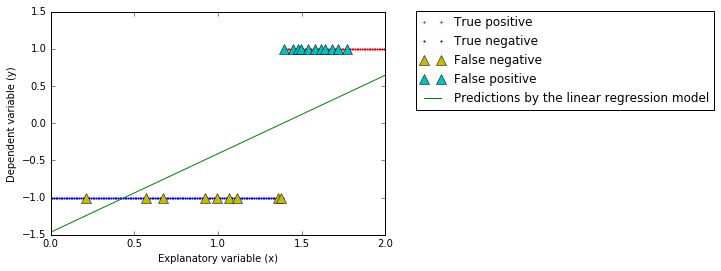

In [11]:
plotbc(x_tr, z, z_class)
plt.plot(x_tr,z_hat,"-g",lw=1, label='Predictions by the linear regression model');
plt.legend(bbox_to_anchor=(2, 1.03))
plt.xlabel('Explanatory variable (x)')
plt.ylabel('Dependent variable (y)')

Let's compute the confusion rate.

In [12]:
precision(z_class, z)

The classification rate is :
0.9


But maybe we could get more information with the [confusion matrix](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)!

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(z,z_class)/float(len(z))

array([[ 0.65 ,  0.055],
       [ 0.045,  0.25 ]])

### Logistic regression

We will now perform classification using [logistic regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). The modelisation behind the logistic regression is  

\begin{equation}
    \mathbb{P}(y^{(i)} = 1 \ | \ \ x^{(i)}) = \frac{1}{1+e^{-\beta_{0}-\beta_{1}x_{1}^{(i)}}}
\end{equation}

where $\boldsymbol{\beta}$ is estimated with [maximum likelihood](https://en.wikipedia.org/wiki/Logistic_regression#Estimation)

\begin{equation}
\widehat{\boldsymbol{\beta}} = \arg\!\max_{\boldsymbol{\beta}} \prod_{i=1}^{n} \mathbb{P}(y^{(i)} = 1 \ | \ \ x^{(i)})^{y^{(i)}} \big(1-\mathbb{P}(y^{(i)} = 1 \ | \ \ x^{(i)})\big)^{ -y^{(i)}} \  \ . 
\end{equation}





In [14]:
from sklearn import linear_model, datasets

#The C parameter (Strictly positive) controls the regularization strength
#Smaller values specify stronger regularization
logreg = linear_model.LogisticRegression(C=1e5)

logreg.fit(x_tr[:, np.newaxis], z)
z_hat=logreg.predict(x_tr[:, np.newaxis])

array([[ 0.655,  0.05 ],
       [ 0.055,  0.24 ]])

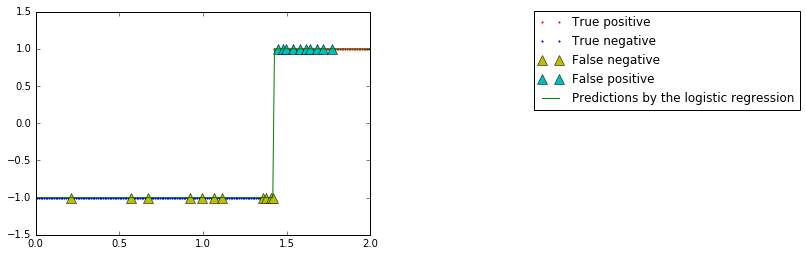

In [15]:
plotbc(x_tr, z, z_hat)
plt.plot(x_tr,z_hat,"-g",lw=1, label='Predictions by the logistic regression');

plt.legend(bbox_to_anchor=(2.3, 1.03))
confusion_matrix(z,z_hat)/float(len(z))

The classification rate seem slightly better...

## Cross-validation and estimation of generalization error

In a classification problem, where we try to predict a discret outcome given some observed informations, the classification error rate calculated on the dataset wich we used to fit (or train) the model should be lower than the error rate calculated on an independent, external dataset. Thus, we cannot rely on the classification error rate based on the dataset on wich we fitted the model because it may be overoptimistic. Then, in machine learning, once we trained the model on a specific dataset (the TRAIN set), we wish to test its reactions with new observations. This specific set of new observations is called the VALIDATION set). One lazy way to get a new set of observation is to split the original dataset in two parts : the training set (composed of 80% the observations) and the validation set.

#### Question

What percentage of the original dataset's observation is include in the validation set?

Now, let's just split the original dataset with the [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function.

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_valid, z_train, z_valid = train_test_split(x_tr, z, test_size=0.2, random_state=3)

This being said, we can now calculate the prediction error rate on the train and the test sets.

#### Question

a) Which algorithm should present the best performances?

b) Can we rely on this results? Why?

In [17]:
clf = logreg.fit(x_train[:, np.newaxis], z_train)

#z_hat_train=logreg.predict(x_train[:, np.newaxis])
#z_hat_test=logreg.predict(x_test[:, np.newaxis])

score_train = clf.score(x_train[:, np.newaxis], z_train)
score_valid = clf.score(x_valid[:, np.newaxis], z_valid)

print("The prediction error rate on the train set is : ")
print(score_train)
print("The prediction error rate on the test set is : ")
print(score_valid)

The prediction error rate on the train set is : 
0.875
The prediction error rate on the test set is : 
0.925


We created the train and validation sets randomly. Hence, considering that the original dataset has a small number of observations, 200, the division of the data may favorized either the train or even the validation dataset. 

One way to counteract the randomness of the data division is to simply iterate the above commande. Here are the main steps : 

1) Repeat a large number of time the original dataset's division in train and validation sets.

2) For each division (or iteration), we fit the model and then after calculate the prediction error rate on the corresponding train and validation set. 

3) Average the prediction errors overall train and validation sets.


In [19]:
#Number of iterations
n=1000

score_train_vec_log = np.zeros(n)
score_valid_vec_log = np.zeros(n)

#Loop of iterations
for k in  np.arange(n):
    x_train, x_valid, z_train, z_valid = train_test_split(x_tr, z, test_size=0.2, random_state=k)
    
    clf = logreg.fit(x_train[:, np.newaxis], z_train)
    
    score_train_vec_log[k] = clf.score(x_train[:, np.newaxis], z_train)
    score_valid_vec_log[k] = clf.score(x_valid[:, np.newaxis], z_valid)

print("The average prediction error rate on the train set is : ")
print(np.mean(score_train_vec_log))

print("The average prediction error rate on the test set is : ")
print(np.mean(score_valid_vec_log))

The average prediction error rate on the train set is : 
0.89479375
The average prediction error rate on the test set is : 
0.890675


# Support Vector Machines (SVM)

We just learned 2 linear classifiers : univariate regression and logistic regression. [Linear classifiers](https://en.wikipedia.org/wiki/Linear_classifier) are a famous algorithms family where classification of the data is done with a descriminative hyperplane. In the present section, we will talk about the Support Vector Machine ([SVM](http://scikit-learn.org/stable/modules/svm.html)), a widely used (linear) classifier in machine learning. Let's start with some some textbook problems...

There are two classes of observations, shown in blue and in purple, each of which has measurements on two variables. Three separating hyperplanes, out of many possible, are shown in black. Which one should we use?

(-0.5, 539.5, 536.5, -0.5)

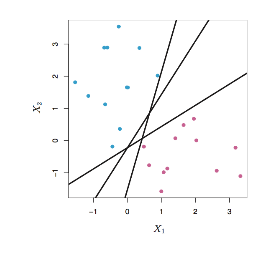

In [39]:
img = plt.imread("../data/hyperplanes.png")
plt.imshow(img)
plt.axis("off")

The maximal margin hyperplane is shown in as a solide black line. The margin is the distance form the solid line to either of the dashed lines. The two blue points and the purple point that lie on the dashed lines are the support vectors. The blue and the purple grid indicates the decision rule made by a classifier based on this separating hyperplane.

(-0.5, 674.5, 655.5, -0.5)

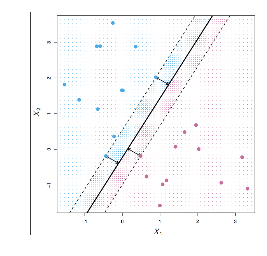

In [38]:
img = plt.imread("../data/maximal.margin.png")
plt.imshow(img)
plt.axis("off")

Some motivations behind the SVM method have their roots in the [linearly separable concept](https://en.wikipedia.org/wiki/Linear_separability). Sometimes, the data is not linearly separable. Thus we can't use  a maximal margin classifier.

(-0.5, 566.5, 496.5, -0.5)

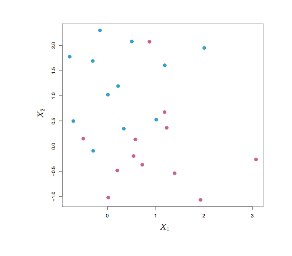

In [37]:
img = plt.imread("../data/non.separable.png")
plt.imshow(img)
plt.axis("off")

A good strategy could be to consider a classifier based on a hyperplane that does not perfectly separate the two classes. Thus, it could be worthwile to misclassify somes observations in order to do a better job in classifying the remaining observations. We call this technic the support vector classifier (with soft margin).

(-0.5, 791.5, 636.5, -0.5)

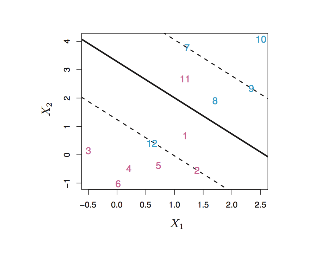

In [36]:
img = plt.imread("../data/support.vector.png")
plt.imshow(img)
plt.axis("off")

Sometimes, good margins don't even exist and support vector classifier are useless.

(-0.5, 382.5, 255.5, -0.5)

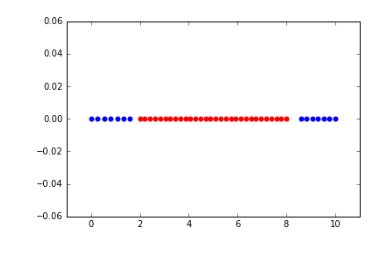

In [35]:
img = plt.imread("../data/kernel.example.1.png")
plt.imshow(img)
plt.axis("off")

In this specific case, a smart strategy would be to enlarge the feature space with a non-linear transformation. Then,  find a good margin.

(-0.5, 364.5, 255.5, -0.5)

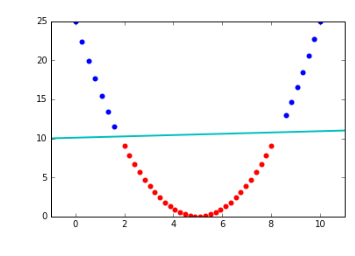

In [33]:
img = plt.imread("../data/kernel.example.2.png")
plt.imshow(img)
plt.axis("off")

The new margin (in $\mathbb{R}^2$) corresponds to the following margins in $\mathbb{R}$.   

(-0.5, 382.5, 255.5, -0.5)

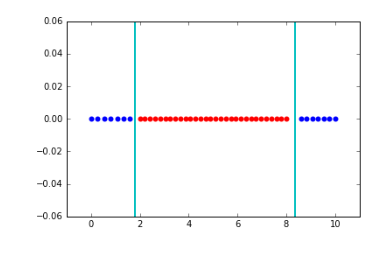

In [34]:
img = plt.imread("../data/kernel.example.3.png")
plt.imshow(img)
plt.axis("off")

## Support Vector Machines (SVM) with RBF kernel

We will now use the [Support Vector Machines](https://en.wikipedia.org/wiki/Support_vector_machine) (SVM) method to perform classification. But first, let's create some new artificial data. The explanatory variable's distribution is a [gaussian mixture](https://en.wikipedia.org/wiki/Mixture_model#Gaussian_mixture_model) where

\begin{equation}
    X_{1} \sim \mathcal{N}_{2}(\mu = (1,1) , \sigma^{2} = I_{2}) \\
    X_{2} \sim \mathcal{N}_{2}(\mu = (3,3) , \sigma^{2} = I_{2}) \ \ . 
\end{equation}

We finally plot the data. We can observe that each distribution is associated with a specific color.

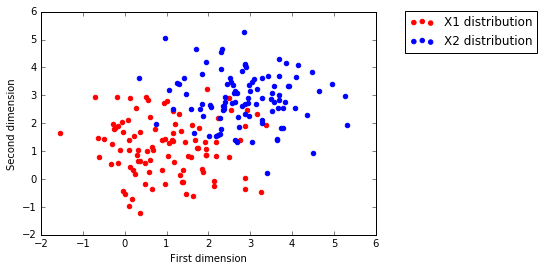

In [27]:
n=100
np.random.seed(0)

X=np.vstack((np.random.multivariate_normal([1,1],[[1,0],[0,1]] ,n), np.random.multivariate_normal([3,3],[[1,0],[0,1]] ,n)))
Y =np.array([0] * n + [1] * n)
index=(Y==0)

plt.scatter(X[index,0], X[index,1], color="r", label='X1 distribution')
plt.scatter(X[~index,0], X[~index,1], color="b", label='X2 distribution')

plt.xlabel('First dimension')
plt.ylabel('Second dimension')
plt.legend(bbox_to_anchor=(1.5, 1.03))

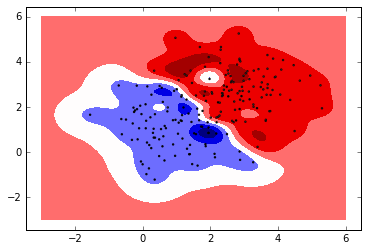

In [28]:
from sklearn import svm

clf = svm.SVC(kernel="rbf", gamma=2 ,C=10).fit(X,Y)

Z=clf.predict(X)
index=(Z==0)
plt.scatter(X[index,0], X[index,1], edgecolors="b")
plt.scatter(X[~index,0], X[~index,1], edgecolors="r")
xx, yy = np.meshgrid(np.linspace(-3, 6, 500), np.linspace(-3, 6, 500))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=1, cmap=plt.cm.seismic)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=2, alpha=0.9, cmap=plt.cm.spectral)

for the list of colormap options see [colormap help](http://matplotlib.org/users/colormaps.html) and to learn more about SVM and related options check [svm tutorial](http://scikit-learn.org/stable/modules/svm.html) and [support vector classification (svc) examples](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC).

### Back to our original problem

Finally, we can compare the logistic regression's and the SVM's performances on the first dataset that we created earlier. 

In [30]:
#Number of iterations
n=1000

score_train_vec_svm = np.zeros(n)
score_valid_vec_svm = np.zeros(n)

#Loop of iterations
for k in  np.arange(n):
    x_train, x_valid, z_train, z_valid = train_test_split(x_tr, z, test_size=0.2, random_state=k)
    
    #Command for the SVM
    clf = svm.SVC(kernel='rbf', C=.1, gamma=3.2).fit(x_train[:, np.newaxis], z_train) 
    
    score_train_vec_svm[k] = clf.score(x_train[:, np.newaxis], z_train)
    score_valid_vec_svm[k] = clf.score(x_valid[:, np.newaxis], z_valid)

print("The SVM's average prediction error rate on the train set is : ")
print(np.mean(score_train_vec_svm))

print("The SVM's average prediction error rate on the test set is : ")
print(np.mean(score_valid_vec_svm))

The SVM's average prediction error rate on the train set is : 
0.88580625
The SVM's average prediction error rate on the test set is : 
0.8825


In [31]:
print("The logistic regression's average prediction error rate on the train set is : ")
print(np.mean(score_train_vec_log))

print("The logistic regression's average prediction error rate on the test set is : ")
print(np.mean(score_valid_vec_log))

The logistic regression's average prediction error rate on the train set is : 
0.89479375
The logistic regression's average prediction error rate on the test set is : 
0.890675
